In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from numpy.polynomial import Polynomial

# Set the float format to prevent scientific notation
pd.options.display.float_format = '{:.5f}'.format
pd.set_option('display.max_columns', None)

In [2]:
ma = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data.csv')
ma

/var/folders/gk/2dbxfg1d3g96xh9f5t1plpg00000gn/T/ipykernel_48700/1722016811.py:1: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  ma = pd.read_csv('/Users/sid/Library/CloudStorage/OneDrive-DeakinUniversity/UDocs - D/DataSets/ma2020/ma_ntl_data.csv')


,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,...,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin
0,0.000000,764.453125,1127.375977,1373.128296,1094.649536,672.698486,732.883728,948.528137,272.509979,898.654663,...,27.0,Port Blair,8.252285,0.444495,5,1,2,0,2,1
1,0.000000,678.448303,1017.647522,1103.718140,854.867248,955.702637,720.269043,924.177856,335.050873,36.830818,...,191.0,Little Andaman,NaN,0.727085,8,6,4,0,2,5
2,0.000000,470.843079,645.058472,804.060852,561.214600,486.784760,370.051636,625.647095,82.436089,438.368164,...,45.0,Diglipur,10.850803,2.189922,2,1,3,0,1,1
3,0.000000,148.697555,200.035919,242.175263,215.893616,195.897675,64.352234,202.987183,27.508814,179.200897,...,11.0,Little Andaman,NaN,0.202318,0,1,1,0,1,0
4,0.000000,113.407997,173.274399,206.772049,152.227646,155.468994,123.534119,157.893219,12.408429,91.496864,...,11.0,Port Blair,10.561343,4.982144,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513717,0.021728,0.049706,0.048849,0.058442,0.041937,0.032316,0.000000,0.046278,0.061620,0.050038,...,0.0,Islampur,10.877604,0.190227,1,1,2,0,2,1
513718,0.021728,0.049706,0.048849,0.058442,0.041937,0.032316,0.000000,0.046278,0.061620,0.050038,...,335.0,Chopra,5.079271,0.190227,2,4,1,0,2,6
513719,0.026101,0.036576,0.046238,0.040664,0.035523,0.030642,0.018229,0.013102,0.018347,0.024743,...,5.0,Chanchal - I,11.800491,0.157000,1,1,1,1,0,2
513720,0.016149,0.026360,0.028799,0.031679,0.025589,0.025489,0.021843,0.017306,0.031752,0.030373,...,0.0,Chopra,5.079271,0.704396,2,4,2,1,2,5


In [6]:
ma = ma[ma['avg_ntl'] != '#DIV/0!']
ma['avg_ntl'] = ma['avg_ntl'].astype(float)
ma['total_population'] = pd.to_numeric(ma['total_population'], errors='coerce')
ma = ma.dropna(subset=['total_population'])
ma['total_population'] = ma['total_population'].astype(float)

In [7]:
avg_ntl = ma.groupby('State').agg({'avg_ntl': 'sum', 'total_population': 'sum'}).reset_index()
avg_ntl['avg_ntl'] = avg_ntl['avg_ntl'].astype(float)

#Rename columns
avg_ntl = avg_ntl.rename(columns={'avg_ntl': 'state_ntl', 'total_population': 'state_population'})

# NTL per capita
avg_ntl['state_ntl_pc'] = avg_ntl['state_ntl']/avg_ntl['state_population']

# Drop states with No pop values
avg_ntl = avg_ntl[avg_ntl['state_ntl_pc'] != np.inf]
# Replace ntl_pc inf with 0
#avg_ntl['ntl_pc'] = avg_ntl['ntl_pc'].replace([np.inf, -np.inf], 0) 
# avg_ntl = avg_ntl.reset_index()
avg_ntl

,State,state_ntl,state_population,state_ntl_pc
0,ANDAMAN AND NICOBAR ISLANDS,4.255105e+03,202987.0,0.020962
1,ANDHRA PRADESH,7.023931e+05,38907953.0,0.018053
2,ASSAM,2.099334e+05,26248649.0,0.007998
3,BIHAR,6.318464e+05,126585181.0,0.004991
4,CHHATTISGARH,3.607204e+05,22064365.0,0.016349
5,GOA,1.892792e+04,1035210.0,0.018284
6,GUJARAT,7.463229e+05,39781687.0,0.018760
7,HARYANA,3.440760e+05,20847879.0,0.016504
8,JHARKHAND,3.368059e+05,31838519.0,0.010579
9,KARNATAKA,5.691833e+05,39316683.0,0.014477


In [9]:
# Assuming your DataFrame is named 'df'
total_population_sum = avg_ntl['state_population'].sum()

print(f"Total State Population Sum: {total_population_sum}")

Total State Population Sum: 951895962.0


In [12]:

# List of columns to keep
columns_to_keep = [
    'avg_ntl', 'med_ntl', 'DTNAME', 'State_code', 'State', 'State_census_code',
    'District_census_code', 'District', 'District_code', 'SubDistric',
    'Subdistrict', 'Subdistr_2', 'village_code', 'Village', 'Block_code',
    'Block', 'state_code', 'state_name', 'district_code', 'district_name',
    'sub_district_code', 'sub_district_name', 'block_code', 'block_name',
    'gp_code', 'gp_name', 'village_name', 'village_pin_code', 'total_population'
]

# Create a new DataFrame with only the selected columns
new_ma = ma[columns_to_keep]

# Drop pop NaN values
new_ma = new_ma.dropna(subset=['total_population'])

# NTL per capita
new_ma['ntl_pc'] = new_ma['avg_ntl']/new_ma['total_population']

new_ma


,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,total_population,ntl_pc
0,843.89867,856.98962,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5922.00000,Ferrargunj,6493.00000,FERRARGUNJ,273036.00000,COLLINPUR,Colinpur (RV),744102.00000,395.00000,2.13645
1,710.82546,727.82294,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5924.00000,Little Andaman,6494.00000,LITTLE ANDAMAN,234494.00000,NETAJINAGAR,Netaji Nagar (RV),744207.00000,4252.00000,0.16717
2,487.54864,486.78476,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5919.00000,Diglipur,5919.00000,645213.00000,Radha Nagar (RV),6492.00000,DIGLIPUR,35.00000,ANDAMAN AND NICOBAR ISLANDS,632.00000,NORTH AND MIDDLE ANDAMAN,5919.00000,Diglipur,6492.00000,DIGLIPUR,234473.00000,RADHANAGAR,Radha Nagar (RV),744202.00000,1091.00000,0.44688
3,158.15380,179.20090,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5921.00000,Rangat,5921.00000,645376.00000,Udhaygarh (RV),6497.00000,RANGAT,35.00000,ANDAMAN AND NICOBAR ISLANDS,632.00000,NORTH AND MIDDLE ANDAMAN,5921.00000,Rangat,6497.00000,RANGAT,234526.00000,SUNDERGHAR,Udhaygarh (RV),744210.00000,146.00000,1.08325
4,127.98762,138.24115,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5923.00000,Port Blair,5923.00000,645540.00000,Rutland (RV),6496.00000,PROTHRAPUR,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5923.00000,Port Blair,6496.00000,PROTHRAPUR,234505.00000,BEODNABAD,Rutland (RV),744105.00000,130.00000,0.98452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513717,0.04733,0.04971,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308950.00000,Phulhara,2882.00000,ISLAMPUR,19.00000,WEST BENGAL,311.00000,DINAJPUR UTTAR,2192.00000,Islampur,2882.00000,ISLAMPUR,109297.00000,RAMGANJ-I,Phulhara,733207.00000,13250.00000,0.00000
513718,0.04733,0.04971,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308950.00000,Phulhara,2882.00000,ISLAMPUR,19.00000,WEST BENGAL,311.00000,DINAJPUR UTTAR,2192.00000,Islampur,2882.00000,ISLAMPUR,109298.00000,RAMGANJ-II,Phulhara,733207.00000,5010.00000,0.00001
513719,0.03043,0.03145,MALDAH,19.00000,WESTBENGAL,19.00000,316.00000,MALDAH,332.00000,2208.00000,Harischandrapur - I,2208.00000,312003.00000,Dhuripara,2938.00000,HARISHCHANDRAPUR-I,19.00000,WEST BENGAL,316.00000,MALDAH,2208.00000,Harischandrapur - I,2938.00000,HARISHCHANDRAPUR-I,109914.00000,BARUI,Dhuripara,732140.00000,600.00000,0.00005
513720,0.02567,0.02597,UTTAR DINAJPUR,19.00000,WESTBENGAL,19.00000,311.00000,DINAJPUR UTTAR,330.00000,2192.00000,Islampur,2192.00000,308949.00000,Manikpur,2882.00000,ISLAMPUR,19.00000,WEST BENGAL,311.00000,DINAJPUR UTTAR,2192.00000,Islampur,2882.00000,ISLAMPUR,109298.00000,RAMGANJ-II,Manikpur,733207.00000,4439.00000,0.00001


In [14]:
new_ma2 = pd.merge(new_ma, avg_ntl, on='State', how='outer')
new_ma2['pop_share'] = new_ma2['total_population']/new_ma2['state_population']
pp = new_ma2[new_ma2['village_code']==627026.00000]
pp

,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,total_population,ntl_pc,state_ntl,state_population,state_ntl_pc,pop_share
94591,163.06462,191.64850,SOUTH GOA,30.00000,GOA,30.00000,552.00000,SOUTH GOA,586.00000,5619.00000,Canacona,5619.00000,627026.00000,Poinguinim,5935.00000,CANACONA,30.00000,GOA,552.00000,SOUTH GOA,5619.00000,Canacona,5935.00000,CANACONA,254475.00000,POINGUINIM,Poinguinim,403702.00000,7414.00000,0.02199,18927.91919,1035210.00000,0.01828,0.00716


In [16]:

# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['state_ntl_pc'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

# Calculate WCV for each state using groupby and apply
result = new_ma2.groupby('State').apply(calculate_wcv)

# Reset the index and rename the result column
result = result.reset_index(name='WCV')

new_ma3 = pd.merge(result, avg_ntl, on='State', how='outer')

result

,State,WCV
0,ANDAMAN AND NICOBAR ISLANDS,0.75686
1,ANDHRA PRADESH,0.40401
2,ASSAM,1.10295
3,BIHAR,0.85768
4,CHHATTISGARH,1.58032
5,GOA,0.19884
6,GUJARAT,0.39672
7,HARYANA,1.66616
8,JHARKHAND,1.01487
9,KARNATAKA,0.90227


In [17]:
state_counts = new_ma2['State'].value_counts()
print(state_counts)

UTTAR PRADESH                  85680
ODISHA                         47639
BIHAR                          43772
MADHYA PRADESH                 42329
MAHARASHTRA                    36203
WESTBENGAL                     35655
RAJASTHAN                      34823
JHARKHAND                      29124
KARNATAKA                      23484
GUJARAT                        18026
CHHATTISGARH                   17662
ANDHRA PRADESH                 17019
ASSAM                          15928
TAMIL NADU                     15080
TELANGANA                      14131
PUNJABB                        13657
UTTARAKHAND                    13243
HARYANA                         6561
TRIPURA                         1626
KERALA                          1537
GOA                              323
ANDAMAN AND NICOBAR ISLANDS      180
Name: State, dtype: int64


## State Calculations

In [21]:
mer = ma.copy()
mer["ntl_pc"]= mer['avg_ntl']/mer['total_population']
mer["ntl_adm"]= mer['avg_ntl'] * 0.0522
mer["ntl_edu"]= mer['avg_ntl'] * 0.0395
mer["ntl_med"]= mer['avg_ntl'] * 0.0098
mer["ntl_adm_R"]= mer['ntl_adm'] * 0.585
mer["ntl_edu_R"]= mer['ntl_edu'] * 0.585
mer["ntl_med_R"]= mer['ntl_med'] * 0.585

mer["ntl_pc"]= mer['avg_ntl']/mer['total_population']
mer["ntl_pc_adm"]= mer['ntl_adm']/mer['total_population']
mer["ntl_pc_edu"]= mer['ntl_edu']/mer['total_population']
mer["ntl_pc_med"]= mer['ntl_med']/mer['total_population']
mer["ntl_pc_adm_R"]= mer['ntl_adm_R']/mer['total_population']
mer["ntl_pc_edu_R"]= mer['ntl_edu_R']/mer['total_population']
mer["ntl_pc_med_R"]= mer['ntl_med_R']/mer['total_population']

mer

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,total_cultivable_area_in_hac,total_hhd_having_bpl_cards,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,no_of_children_not_attending_school,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_adm_R,ntl_edu_R,ntl_med_R,ntl_pc_adm,ntl_pc_edu,ntl_pc_med,ntl_pc_adm_R,ntl_pc_edu_R,ntl_pc_med_R
0,0.00000,764.45312,1127.37598,1373.12830,1094.64954,672.69849,732.88373,948.52814,272.50998,898.65466,856.98962,541.01386,843.89867,856.98962,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5922.00000,Ferrargunj,6493.00000,FERRARGUNJ,273036.00000,COLLINPUR,Colinpur (RV),744102.00000,543.00000,NaN,NaN,395.00000,218.00000,177.00000,101.00000,45.00000,56.00000,56.69000,14.00000,1,0,0,0,1,1,17.00000,4.00000,0.00000,1,1,21.00000,21.00000,12.00000,21.00000,0.00000,0.00000,0.00000,0.00000,17.00000,20.00000,8.00000,27.00000,27.00000,Port Blair,8.25228,0.44449,5,1,2,0,2,1,2.13645,44.05151,33.33400,8.27021,25.77013,19.50039,4.83807,0.11152,0.08439,0.02094,0.06524,0.04937,0.01225
1,0.00000,678.44830,1017.64752,1103.71814,854.86725,955.70264,720.26904,924.17786,335.05087,36.83082,727.82294,464.54468,710.82546,727.82294,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5924.00000,Little Andaman,6494.00000,LITTLE ANDAMAN,234494.00000,NETAJINAGAR,Netaji Nagar (RV),744207.00000,543.00000,NaN,NaN,4252.00000,2339.00000,1913.00000,1127.00000,169.00000,958.00000,91.00000,50.00000,1,0,1,1,1,1,72.00000,12.00000,0.00000,1,1,129.00000,121.00000,70.00000,121.00000,186.00000,0.00000,0.00000,3.00000,120.00000,123.00000,130.00000,191.00000,191.00000,Little Andaman,NaN,0.72709,8,6,4,0,2,5,0.16717,37.10509,28.07761,6.96609,21.70648,16.42540,4.07516,0.00873,0.00660,0.00164,0.00511,0.00386,0.00096
2,0.00000,470.84308,645.05847,804.06085,561.21460,486.78476,370.05164,625.64709,82.43609,438.36816,531.12653,347.44379,487.54864,486.78476,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5919.00000,Diglipur,5919.00000,645213.00000,Radha Nagar (RV),6492.00000,DIGLIPUR,35.00000,ANDAMAN AND NICOBAR ISLANDS,632.00000,NORTH AND MIDDLE ANDAMAN,5919.00000,Diglipur,6492.00000,DIGLIP

In [32]:
mer_state = mer.groupby('State').agg({'avg_ntl': 'sum', 'total_population': 'sum'}).reset_index()
mer_state_adm = mer.groupby('State').agg({'ntl_adm': 'sum', 'total_population': 'sum'}).reset_index()
mer_state_edu = mer.groupby('State').agg({'ntl_edu': 'sum', 'total_population': 'sum'}).reset_index()
mer_state_med = mer.groupby('State').agg({'ntl_med': 'sum', 'total_population': 'sum'}).reset_index()
#R2 Values
mer_state_adm_R = mer.groupby('State').agg({'ntl_adm_R': 'sum', 'total_population': 'sum'}).reset_index()
mer_state_edu_R = mer.groupby('State').agg({'ntl_edu_R': 'sum', 'total_population': 'sum'}).reset_index()
mer_state_med_R = mer.groupby('State').agg({'ntl_med_R': 'sum', 'total_population': 'sum'}).reset_index()

mer_state['avg_ntl'] = mer_state['avg_ntl'].astype(float)
mer_state_adm['ntl_adm'] = mer_state_adm['ntl_adm'].astype(float)
mer_state_edu['ntl_edu'] = mer_state_edu['ntl_edu'].astype(float)
mer_state_med['ntl_med'] = mer_state_med['ntl_med'].astype(float)
#R2 Values
mer_state_adm_R['ntl_adm_R'] = mer_state_adm_R['ntl_adm_R'].astype(float)
mer_state_edu_R['ntl_edu_R'] = mer_state_edu_R['ntl_edu_R'].astype(float)
mer_state_med_R['ntl_med_R'] = mer_state_med_R['ntl_med_R'].astype(float)

#Rename columns
mer_state = mer_state.rename(columns={'avg_ntl': 'state_ntl', 'total_population': 'state_population'})
mer_state_adm = mer_state_adm.rename(columns={'ntl_adm': 'state_ntl_adm', 'total_population': 'state_population'})
mer_state_edu = mer_state_edu.rename(columns={'ntl_edu': 'state_ntl_edu', 'total_population': 'state_population'})
mer_state_med = mer_state_med.rename(columns={'ntl_med': 'state_ntl_med', 'total_population': 'state_population'})
#R2 Values
mer_state_adm_R = mer_state_adm_R.rename(columns={'ntl_adm_R': 'state_ntl_adm_R', 'total_population': 'state_population'})
mer_state_edu_R = mer_state_edu_R.rename(columns={'ntl_edu_R': 'state_ntl_edu_R', 'total_population': 'state_population'})
mer_state_med_R = mer_state_med_R.rename(columns={'ntl_med_R': 'state_ntl_med_R', 'total_population': 'state_population'})

# NTL per capita
mer_state['state_ntl_pc'] = mer_state['state_ntl']/mer_state['state_population']
mer_state_adm['state_ntl_pc_adm'] = mer_state_adm['state_ntl_adm']/mer_state_adm['state_population']
mer_state_edu['state_ntl_pc_edu'] = mer_state_edu['state_ntl_edu']/mer_state_edu['state_population']
mer_state_med['state_ntl_pc_med'] = mer_state_med['state_ntl_med']/mer_state_med['state_population']
#R2 Values
mer_state_adm_R['state_ntl_pc_adm_R'] = mer_state_adm_R['state_ntl_adm_R']/mer_state_adm['state_population']
mer_state_edu_R['state_ntl_pc_edu_R'] = mer_state_edu_R['state_ntl_edu_R']/mer_state_edu['state_population']
mer_state_med_R['state_ntl_pc_med_R'] = mer_state_med_R['state_ntl_med_R']/mer_state_med['state_population']

mer_state_adm = mer_state_adm.drop(columns=['state_population'])
mer_state_edu = mer_state_edu.drop(columns=['state_population'])
mer_state_med = mer_state_med.drop(columns=['state_population'])
#R2 Values
mer_state_adm_R = mer_state_adm_R.drop(columns=['state_population'])
mer_state_edu_R = mer_state_edu_R.drop(columns=['state_population'])
mer_state_med_R = mer_state_med_R.drop(columns=['state_population'])


mer_state

,State,state_ntl,state_population,state_ntl_pc
0,ANDAMAN AND NICOBAR ISLANDS,4255.10544,202987.00000,0.02096
1,ANDHRA PRADESH,702393.05979,38907953.00000,0.01805
2,ASSAM,209933.43898,26248649.00000,0.00800
3,BIHAR,631846.36680,126585181.00000,0.00499
4,CHHATTISGARH,360720.39705,22064365.00000,0.01635
5,GOA,18927.91919,1035210.00000,0.01828
6,GUJARAT,746322.90349,39781687.00000,0.01876
7,HARYANA,344076.03613,20847879.00000,0.01650
8,JHARKHAND,336805.93059,31838519.00000,0.01058
9,KARNATAKA,569183.29912,39316683.00000,0.01448


In [34]:
mer_all = pd.merge(mer, mer_state, on="State", how='outer')
mer_all = pd.merge(mer_all, mer_state_adm, on="State", how='outer')
mer_all = pd.merge(mer_all, mer_state_edu, on="State", how='outer')
mer_all = pd.merge(mer_all, mer_state_med, on="State", how='outer')
mer_all = pd.merge(mer_all, mer_state_adm_R, on="State", how='outer')
mer_all = pd.merge(mer_all, mer_state_edu_R, on="State", how='outer')
mer_all = pd.merge(mer_all, mer_state_med_R, on="State", how='outer')
mer_all['pop_share'] = mer_all['total_population']/mer_all['state_population']
mer_all

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,total_cultivable_area_in_hac,total_hhd_having_bpl_cards,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,no_of_children_not_attending_school,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_adm_R,ntl_edu_R,ntl_med_R,ntl_pc_adm,ntl_pc_edu,ntl_pc_med,ntl_pc_adm_R,ntl_pc_edu_R,ntl_pc_med_R,state_ntl,state_population,state_ntl_pc,state_ntl_adm,state_ntl_pc_adm,state_ntl_edu,state_ntl_pc_edu,state_ntl_med,state_ntl_pc_med,state_ntl_adm_R,state_ntl_pc_adm_R,state_ntl_edu_R,state_ntl_pc_edu_R,state_ntl_med_R,state_ntl_pc_med_R,pop_share
0,0.00000,764.45312,1127.37598,1373.12830,1094.64954,672.69849,732.88373,948.52814,272.50998,898.65466,856.98962,541.01386,843.89867,856.98962,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5922.00000,Ferrargunj,6493.00000,FERRARGUNJ,273036.00000,COLLINPUR,Colinpur (RV),744102.00000,543.00000,NaN,NaN,395.00000,218.00000,177.00000,101.00000,45.00000,56.00000,56.69000,14.00000,1,0,0,0,1,1,17.00000,4.00000,0.00000,1,1,21.00000,21.00000,12.00000,21.00000,0.00000,0.00000,0.00000,0.00000,17.00000,20.00000,8.00000,27.00000,27.00000,Port Blair,8.25228,0.44449,5,1,2,0,2,1,2.13645,44.05151,33.33400,8.27021,25.77013,19.50039,4.83807,0.11152,0.08439,0.02094,0.06524,0.04937,0.01225,4255.10544,202987.00000,0.02096,222.11650,0.00109,168.07666,0.00083,41.70003,0.00021,129.93815,0.00064,98.32485,0.00048,24.39452,0.00012,0.00195
1,0.00000,678.44830,1017.64752,1103.71814,854.86725,955.70264,720.26904,924.17786,335.05087,36.83082,727.82294,464.54468,710.82546,727.82294,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5924.00000,Little Andaman,6494.00000,LITTLE ANDAMAN,234494.00000,NETAJINAGAR,Netaji Nagar (RV),744207.00000,543.00000,NaN,NaN,4252.00000,2339.00000,1913.00000,1127.00000,169.00000,958.00000,91.00000,50.00000,1,0,1,1,1,1,72.00000,12.00000,0.00000,1,1,129.00000,121.00000,70.00000,121.00000,186.00000,0.00000,0.00000,3.00000,120.00000,123.00000,130.00000,191.00000,191.00000,Little Andaman,NaN,0.72709,8,6,4,0,2,5,0.16717,37.10509,28.07761,6.96609,21.70648,16.42540,4.07516,0.00873,0.00660,0.00164,0.00511,0.00386,0.00096,4255.10544,202987.00000,0.02096,222.11650,0.00109,

In [38]:

# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['state_ntl_pc'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

def calculate_wcv_adm(group):
    bar_y = group['state_ntl_pc_adm'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_adm'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

def calculate_wcv_edu(group):
    bar_y = group['state_ntl_pc_edu'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_edu'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

def calculate_wcv_med(group):
    bar_y = group['state_ntl_pc_med'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_med'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

def calculate_wcv_adm_R(group):
    bar_y = group['state_ntl_pc_adm_R'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_adm'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

def calculate_wcv_edu_R(group):
    bar_y = group['state_ntl_pc_edu_R'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_edu'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

def calculate_wcv_med_R(group):
    bar_y = group['state_ntl_pc_med_R'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_med'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv


# Calculate WCV for each state using groupby and apply
wcv = mer_all.groupby('State').apply(calculate_wcv)
wcv_adm = mer_all.groupby('State').apply(calculate_wcv_adm)
wcv_edu = mer_all.groupby('State').apply(calculate_wcv_edu)
wcv_med = mer_all.groupby('State').apply(calculate_wcv_med)
wcv_adm_R = mer_all.groupby('State').apply(calculate_wcv_adm_R)
wcv_edu_R = mer_all.groupby('State').apply(calculate_wcv_edu_R)
wcv_med_R = mer_all.groupby('State').apply(calculate_wcv_med_R)

# Reset the index and rename the result column
wcv = wcv.reset_index(name='WCV')
wcv_adm = wcv_adm.reset_index(name='WCV_adm')
wcv_edu = wcv_edu.reset_index(name='WCV_edu')
wcv_med = wcv_med.reset_index(name='WCV_med')
wcv_adm_R = wcv_adm_R.reset_index(name='WCV_adm_R')
wcv_edu_R = wcv_edu_R.reset_index(name='WCV_edu_R')
wcv_med_R = wcv_med_R.reset_index(name='WCV_med_R')

wcv

,State,WCV
0,ANDAMAN AND NICOBAR ISLANDS,0.75686
1,ANDHRA PRADESH,0.40401
2,ASSAM,1.10295
3,BIHAR,0.85768
4,CHHATTISGARH,1.58032
5,GOA,0.19884
6,GUJARAT,0.39672
7,HARYANA,1.66616
8,JHARKHAND,1.01487
9,KARNATAKA,0.90227


In [42]:
wcvc = pd.merge(wcv, mer_state, on="State", how='left')
wcvc = pd.merge(wcvc, mer_state_adm, on="State", how='left')
wcvc = pd.merge(wcvc, wcv_adm, on="State", how='left')
wcvc = pd.merge(wcvc, mer_state_edu, on="State", how='left')
wcvc = pd.merge(wcvc, wcv_edu, on="State", how='left')
wcvc = pd.merge(wcvc, mer_state_med, on="State", how='left')
wcvc = pd.merge(wcvc, wcv_med, on="State", how='left')
wcvc = pd.merge(wcvc, mer_state_adm_R, on="State", how='left')
wcvc = pd.merge(wcvc, wcv_adm_R, on="State", how='left')
wcvc = pd.merge(wcvc, mer_state_edu_R, on="State", how='left')
wcvc = pd.merge(wcvc, wcv_edu_R, on="State", how='left')
wcvc = pd.merge(wcvc, mer_state_med_R, on="State", how='left')
wcvc = pd.merge(wcvc, wcv_med_R, on="State", how='left')

wcvc

,State,WCV,state_ntl,state_population,state_ntl_pc,state_ntl_adm,state_ntl_pc_adm,WCV_adm,state_ntl_edu,state_ntl_pc_edu,WCV_edu,state_ntl_med,state_ntl_pc_med,WCV_med,state_ntl_adm_R,state_ntl_pc_adm_R,WCV_adm_R,state_ntl_edu_R,state_ntl_pc_edu_R,WCV_edu_R,state_ntl_med_R,state_ntl_pc_med_R,WCV_med_R
0,ANDAMAN AND NICOBAR ISLANDS,0.75686,4255.10544,202987.00000,0.02096,222.11650,0.00109,0.17292,168.07666,0.00083,0.15042,41.70003,0.00021,0.07493,129.93815,0.00064,0.22680,98.32485,0.00048,0.19729,24.39452,0.00012,0.09827
1,ANDHRA PRADESH,0.40401,702393.05979,38907953.00000,0.01805,36664.91772,0.00094,0.09231,27744.52586,0.00071,0.08030,6883.45199,0.00018,0.04000,21448.97687,0.00055,0.12183,16230.54763,0.00042,0.10598,4026.81941,0.00010,0.05279
2,ASSAM,1.10295,209933.43898,26248649.00000,0.00800,10958.52551,0.00042,0.25199,8292.37084,0.00032,0.21921,2057.34770,0.00008,0.10919,6410.73743,0.00024,0.32965,4851.03694,0.00018,0.28676,1203.54841,0.00005,0.14284
3,BIHAR,0.85768,631846.36680,126585181.00000,0.00499,32982.38035,0.00026,0.19596,24957.93149,0.00020,0.17046,6192.09439,0.00005,0.08491,19294.69250,0.00015,0.25635,14600.38992,0.00012,0.22300,3622.37522,0.00003,0.11107
4,CHHATTISGARH,1.58032,360720.39705,22064365.00000,0.01635,18829.60473,0.00085,0.36106,14248.45568,0.00065,0.31408,3535.05989,0.00016,0.15644,11015.31876,0.00050,0.47233,8335.34657,0.00038,0.41087,2068.01004,0.00009,0.20466
5,GOA,0.19884,18927.91919,1035210.00000,0.01828,988.03738,0.00095,0.04543,747.65281,0.00072,0.03952,185.49361,0.00018,0.01968,578.00187,0.00056,0.06172,437.37689,0.00042,0.05369,108.51376,0.00010,0.02674
6,GUJARAT,0.39672,746322.90349,39781687.00000,0.01876,38958.05556,0.00098,0.09064,29479.75469,0.00074,0.07885,7313.96445,0.00018,0.03927,22790.46250,0.00057,0.11972,17245.65649,0.00043,0.10414,4278.66921,0.00011,0.05187
7,HARYANA,1.66616,344076.03613,20847879.00000,0.01650,17960.76909,0.00086,0.38067,13591.00343,0.00065,0.33114,3371.94515,0.00016,0.16494,10507.04992,0.00050,0.49796,7950.73700,0.00038,0.43317,1972.58792,0.00009,0.21576
8,JHARKHAND,1.01487,336805.93059,31838519.00000,0.01058,17581.26958,0.00055,0.23187,13303.83426,0.00042,0.20170,3300.69812,0.00010,0.10047,10285.04270,0.00032,0.30343,7782.74304,0.00024,0.26395,1930.90840,0.00006,0.13147
9,KARNATAKA,0.90227,569183.29912,39316683.00000,0.01448,29711.36821,0.00076,0.20614,22482.74032,0.00057,0.17932,5577.99633,0.00014,0.08932,17381.15041,0.00044,0.26993,13152.40308,0.00033,0.23481,3263.12785,0.00008,0.11696


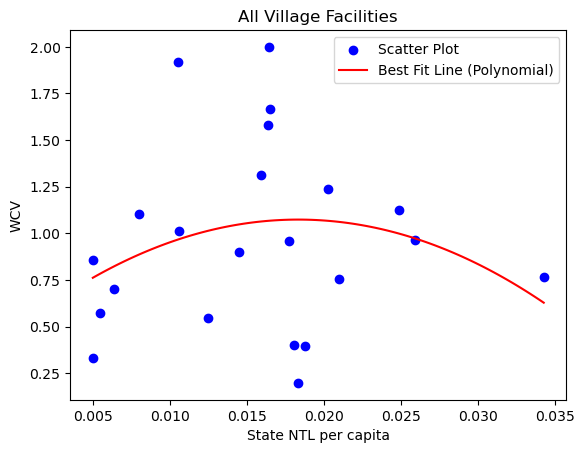

In [60]:
# Create a scatterplot
plt.scatter(wcvc['state_ntl_pc'], wcvc['WCV'], label='Scatter Plot', color='blue', marker='o')

# Add labels and title
plt.xlabel("State NTL per capita")
plt.ylabel("WCV")
plt.title("All Village Facilities")
# plt.title("All Villages")

# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcvc['state_ntl_pc'], wcvc['WCV'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc']), max(wcvc['state_ntl_pc']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

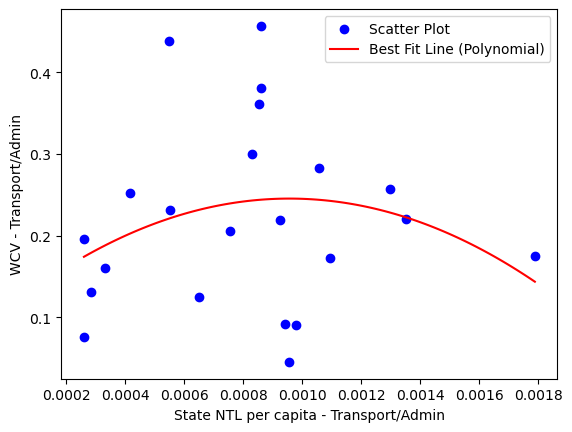

In [47]:
# Create a scatterplot
plt.scatter(wcvc['state_ntl_pc_adm'], wcvc['WCV_adm'], label='Scatter Plot', color='blue', marker='o')

# Add labels and title
plt.xlabel("State NTL per capita - Transport/Admin")
plt.ylabel("WCV - Transport/Admin")
# plt.title("All Villages")

# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcvc['state_ntl_pc_adm'], wcvc['WCV_adm'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_adm']), max(wcvc['state_ntl_pc_adm']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

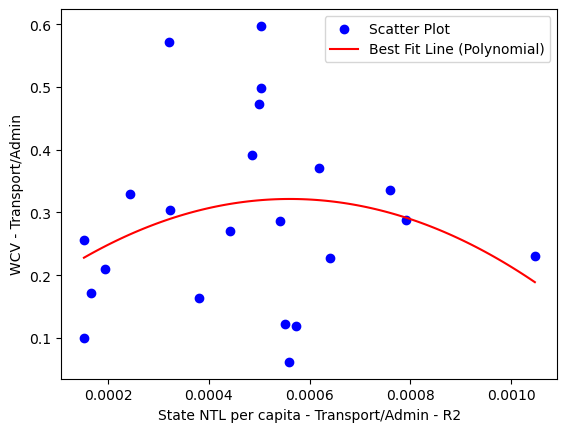

In [48]:
# Create a scatterplot
plt.scatter(wcvc['state_ntl_pc_adm_R'], wcvc['WCV_adm_R'], label='Scatter Plot', color='blue', marker='o')

# Add labels and title
plt.xlabel("State NTL per capita - Transport/Admin - R2")
plt.ylabel("WCV - Transport/Admin")
# plt.title("All Villages")

# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcvc['state_ntl_pc_adm_R'], wcvc['WCV_adm_R'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_adm_R']), max(wcvc['state_ntl_pc_adm_R']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()

# Display the plot
plt.show()





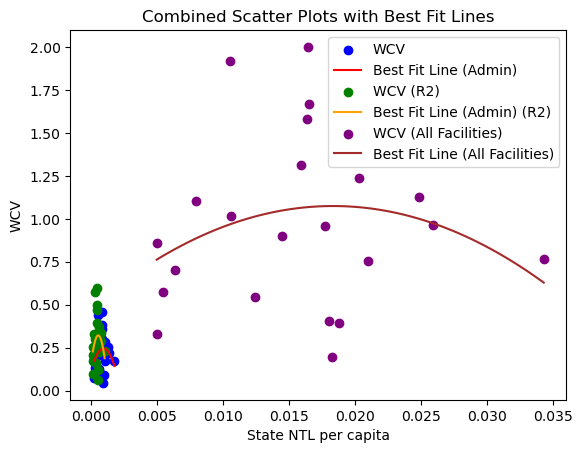

In [56]:
# Create a scatterplot for the first set of data
plt.scatter(wcvc['state_ntl_pc_adm'], wcvc['WCV_adm'], label='WCV', color='blue', marker='o')

# Fit a polynomial best fit line for the first set of data
coefficients = np.polyfit(wcvc['state_ntl_pc_adm'], wcvc['WCV_adm'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_adm']), max(wcvc['state_ntl_pc_adm']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the first set of data
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Admin)')

# Create a scatterplot for the second set of data
plt.scatter(wcvc['state_ntl_pc_adm_R'], wcvc['WCV_adm_R'], label='WCV (R2)', color='green', marker='o')

# Fit a polynomial best fit line for the second set of data
coefficients = np.polyfit(wcvc['state_ntl_pc_adm_R'], wcvc['WCV_adm_R'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_adm_R']), max(wcvc['state_ntl_pc_adm_R']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the second set of data
plt.plot(x_range, y_fit, color='orange', label='Best Fit Line (Admin) (R2)')

# Create a scatterplot for the third set of data
plt.scatter(wcvc['state_ntl_pc'], wcvc['WCV'], label='WCV (All Facilities)', color='purple', marker='o')

# Fit a polynomial best fit line for the third set of data
coefficients = np.polyfit(wcvc['state_ntl_pc'], wcvc['WCV'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc']), max(wcvc['state_ntl_pc']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the third set of data
plt.plot(x_range, y_fit, color='brown', label='Best Fit Line (All Facilities)')

# Add labels, title, and legend
plt.xlabel("State NTL per capita")
plt.ylabel("WCV")
plt.title("Combined Scatter Plots with Best Fit Lines")
plt.legend()

# Display the plot
plt.show()


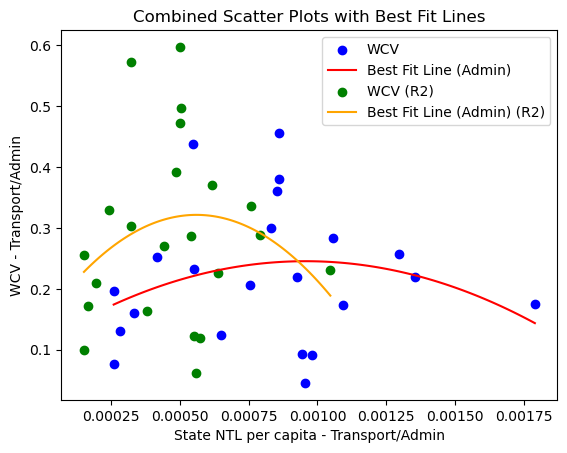

In [57]:
# Assuming you have two DataFrames wcvc and wcvc_R

# Create a scatterplot for the first set of data
plt.scatter(wcvc['state_ntl_pc_adm'], wcvc['WCV_adm'], label='WCV', color='blue', marker='o')

# Fit a polynomial best fit line for the first set of data
coefficients = np.polyfit(wcvc['state_ntl_pc_adm'], wcvc['WCV_adm'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_adm']), max(wcvc['state_ntl_pc_adm']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the first set of data
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Admin)')

# Create a scatterplot for the second set of data
plt.scatter(wcvc['state_ntl_pc_adm_R'], wcvc['WCV_adm_R'], label='WCV (R2)', color='green', marker='o')

# Fit a polynomial best fit line for the second set of data
coefficients = np.polyfit(wcvc['state_ntl_pc_adm_R'], wcvc['WCV_adm_R'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_adm_R']), max(wcvc['state_ntl_pc_adm_R']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the second set of data
plt.plot(x_range, y_fit, color='orange', label='Best Fit Line (Admin) (R2)')

# Add labels, title, and legend
plt.xlabel("State NTL per capita - Transport/Admin")
plt.ylabel("WCV - Transport/Admin")
plt.title("Combined Scatter Plots with Best Fit Lines")
plt.legend()

# Display the plot
plt.show()


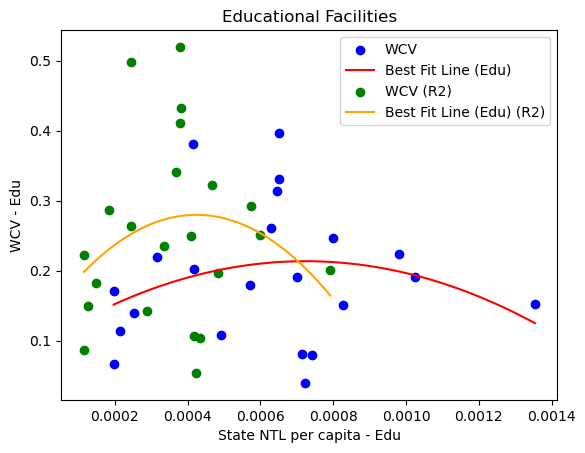

In [61]:
# Assuming you have two DataFrames wcvc and wcvc_R

# Create a scatterplot for the first set of data
plt.scatter(wcvc['state_ntl_pc_edu'], wcvc['WCV_edu'], label='WCV', color='blue', marker='o')

# Fit a polynomial best fit line for the first set of data
coefficients = np.polyfit(wcvc['state_ntl_pc_edu'], wcvc['WCV_edu'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_edu']), max(wcvc['state_ntl_pc_edu']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the first set of data
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Edu)')

# Create a scatterplot for the second set of data
plt.scatter(wcvc['state_ntl_pc_edu_R'], wcvc['WCV_edu_R'], label='WCV (R2)', color='green', marker='o')

# Fit a polynomial best fit line for the second set of data
coefficients = np.polyfit(wcvc['state_ntl_pc_edu_R'], wcvc['WCV_edu_R'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_edu_R']), max(wcvc['state_ntl_pc_edu_R']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the second set of data
plt.plot(x_range, y_fit, color='orange', label='Best Fit Line (Edu) (R2)')

# Add labels, title, and legend
plt.xlabel("State NTL per capita - Edu")
plt.ylabel("WCV - Edu")
plt.title("Educational Facilities")
plt.legend()

# Display the plot
plt.show()


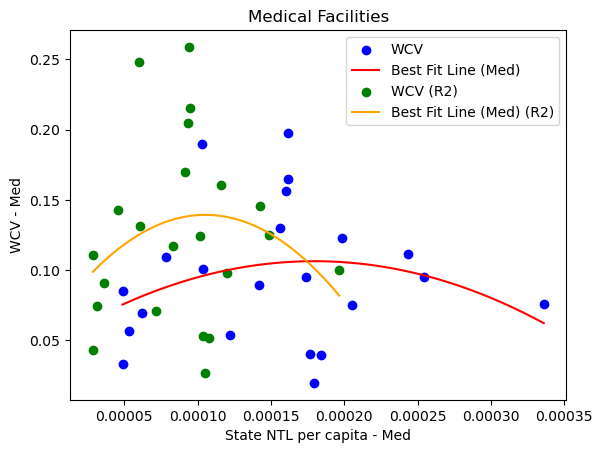

In [63]:
# Assuming you have two DataFrames wcvc and wcvc_R

# Create a scatterplot for the first set of data
plt.scatter(wcvc['state_ntl_pc_med'], wcvc['WCV_med'], label='WCV', color='blue', marker='o')

# Fit a polynomial best fit line for the first set of data
coefficients = np.polyfit(wcvc['state_ntl_pc_med'], wcvc['WCV_med'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_med']), max(wcvc['state_ntl_pc_med']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the first set of data
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Med)')

# Create a scatterplot for the second set of data
plt.scatter(wcvc['state_ntl_pc_med_R'], wcvc['WCV_med_R'], label='WCV (R2)', color='green', marker='o')

# Fit a polynomial best fit line for the second set of data
coefficients = np.polyfit(wcvc['state_ntl_pc_med_R'], wcvc['WCV_med_R'], 2)
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['state_ntl_pc_med_R']), max(wcvc['state_ntl_pc_med_R']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line for the second set of data
plt.plot(x_range, y_fit, color='orange', label='Best Fit Line (Med) (R2)')

# Add labels, title, and legend
plt.xlabel("State NTL per capita - Med")
plt.ylabel("WCV - Med")
plt.title("Medical Facilities")
plt.legend()

# Display the plot
plt.show()


## District Calculations

In [84]:
mer

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,total_cultivable_area_in_hac,total_hhd_having_bpl_cards,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,no_of_children_not_attending_school,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_adm_R,ntl_edu_R,ntl_med_R,ntl_pc_adm,ntl_pc_edu,ntl_pc_med,ntl_pc_adm_R,ntl_pc_edu_R,ntl_pc_med_R
0,0.00000,764.45312,1127.37598,1373.12830,1094.64954,672.69849,732.88373,948.52814,272.50998,898.65466,856.98962,541.01386,843.89867,856.98962,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5922.00000,Ferrargunj,6493.00000,FERRARGUNJ,273036.00000,COLLINPUR,Colinpur (RV),744102.00000,543.00000,NaN,NaN,395.00000,218.00000,177.00000,101.00000,45.00000,56.00000,56.69000,14.00000,1,0,0,0,1,1,17.00000,4.00000,0.00000,1,1,21.00000,21.00000,12.00000,21.00000,0.00000,0.00000,0.00000,0.00000,17.00000,20.00000,8.00000,27.00000,27.00000,Port Blair,8.25228,0.44449,5,1,2,0,2,1,2.13645,44.05151,33.33400,8.27021,25.77013,19.50039,4.83807,0.11152,0.08439,0.02094,0.06524,0.04937,0.01225
1,0.00000,678.44830,1017.64752,1103.71814,854.86725,955.70264,720.26904,924.17786,335.05087,36.83082,727.82294,464.54468,710.82546,727.82294,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5924.00000,Little Andaman,6494.00000,LITTLE ANDAMAN,234494.00000,NETAJINAGAR,Netaji Nagar (RV),744207.00000,543.00000,NaN,NaN,4252.00000,2339.00000,1913.00000,1127.00000,169.00000,958.00000,91.00000,50.00000,1,0,1,1,1,1,72.00000,12.00000,0.00000,1,1,129.00000,121.00000,70.00000,121.00000,186.00000,0.00000,0.00000,3.00000,120.00000,123.00000,130.00000,191.00000,191.00000,Little Andaman,NaN,0.72709,8,6,4,0,2,5,0.16717,37.10509,28.07761,6.96609,21.70648,16.42540,4.07516,0.00873,0.00660,0.00164,0.00511,0.00386,0.00096
2,0.00000,470.84308,645.05847,804.06085,561.21460,486.78476,370.05164,625.64709,82.43609,438.36816,531.12653,347.44379,487.54864,486.78476,NORTH & MIDDLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,632.00000,NORTH AND MIDDLE ANDAMAN,639.00000,5919.00000,Diglipur,5919.00000,645213.00000,Radha Nagar (RV),6492.00000,DIGLIPUR,35.00000,ANDAMAN AND NICOBAR ISLANDS,632.00000,NORTH AND MIDDLE ANDAMAN,5919.00000,Diglipur,6492.00000,DIGLIP

In [66]:
## Use mer from MA Test 2
mer_dist = mer.groupby(['District','District_code','State']).agg({'avg_ntl': 'sum', 'total_population': 'sum'}).reset_index()
mer_dist_adm = mer.groupby(['District','District_code','State']).agg({'ntl_adm': 'sum', 'total_population': 'sum'}).reset_index()
mer_dist_edu = mer.groupby(['District','District_code','State']).agg({'ntl_edu': 'sum', 'total_population': 'sum'}).reset_index()
mer_dist_med = mer.groupby(['District','District_code','State']).agg({'ntl_med': 'sum', 'total_population': 'sum'}).reset_index()

mer_dist['avg_ntl'] = mer_dist['avg_ntl'].astype(float)
mer_dist_adm['ntl_adm'] = mer_dist_adm['ntl_adm'].astype(float)
mer_dist_edu['ntl_edu'] = mer_dist_edu['ntl_edu'].astype(float)
mer_dist_med['ntl_med'] = mer_dist_med['ntl_med'].astype(float)

#Rename columns
mer_dist = mer_dist.rename(columns={'avg_ntl': 'dist_ntl', 'total_population': 'dist_population'})
mer_dist_adm = mer_dist_adm.rename(columns={'ntl_adm': 'dist_ntl_adm', 'total_population': 'dist_population'})
mer_dist_edu = mer_dist_edu.rename(columns={'ntl_edu': 'dist_ntl_edu', 'total_population': 'dist_population'})
mer_dist_med = mer_dist_med.rename(columns={'ntl_med': 'dist_ntl_med', 'total_population': 'dist_population'})


# NTL per capita
mer_dist['dist_ntl_pc'] = mer_dist['dist_ntl']/mer_dist['dist_population']
mer_dist_adm['dist_ntl_pc_adm'] = mer_dist_adm['dist_ntl_adm']/mer_dist_adm['dist_population']
mer_dist_edu['dist_ntl_pc_edu'] = mer_dist_edu['dist_ntl_edu']/mer_dist_edu['dist_population']
mer_dist_med['dist_ntl_pc_med'] = mer_dist_med['dist_ntl_med']/mer_dist_med['dist_population']

mer_dist_adm = mer_dist_adm.drop(columns=['dist_population'])
mer_dist_edu = mer_dist_edu.drop(columns=['dist_population'])
mer_dist_med = mer_dist_med.drop(columns=['dist_population'])


mer_dist

,District,District_code,State,dist_ntl,dist_population,dist_ntl_pc
0,24 PARAGANAS NORTH,337.00000,WESTBENGAL,27768.72298,5979790.00000,0.00464
1,24 PARAGANAS SOUTH,343.00000,WESTBENGAL,35600.34826,8740691.00000,0.00407
2,ADILABAD,532.00000,TELANGANA,14509.40529,557344.00000,0.02603
3,AGAR MALWA,0.00000,MADHYA PRADESH,7963.81906,504286.00000,0.01579
4,AGRA a,146.00000,UTTAR PRADESH,24309.54446,2669545.00000,0.00911
...,...,...,...,...,...,...
591,demoz,0.00000,ANDHRA PRADESH,478.78793,60945.00000,0.00786
592,rewa a,0.00000,UTTAR PRADESH,24145.74876,3116857.00000,0.00775
593,test dist,0.00000,ANDHRA PRADESH,59767.31391,2217985.00000,0.02695
594,viewnew,0.00000,ANDHRA PRADESH,73165.98410,3346483.00000,0.02186


In [67]:
# Assuming your DataFrame is named 'df'
total_population_sum = mer_dist['dist_population'].sum()

print(f"Total State Population Sum: {total_population_sum}")

Total State Population Sum: 951895962.0


In [87]:
mer_all_dist = pd.merge(mer, mer_dist, on=['District','District_code','State'], how='outer')
mer_all_dist = pd.merge(mer_all_dist, mer_dist_adm, on=['District','District_code','State'], how='outer')
mer_all_dist = pd.merge(mer_all_dist, mer_dist_edu, on=['District','District_code','State'], how='outer')
mer_all_dist = pd.merge(mer_all_dist, mer_dist_med, on=['District','District_code','State'], how='outer')
mer_all_dist['pop_share'] = mer_all_dist['total_population']/mer_all_dist['dist_population']
mer_all_dist

,202001,202002,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,avg_ntl,med_ntl,DTNAME,State_code,State,State_census_code,District_census_code,District,District_code,SubDistric,Subdistrict,Subdistr_2,village_code,Village,Block_code,Block,state_code,state_name,district_code,district_name,sub_district_code,sub_district_name,block_code,block_name,gp_code,gp_name,village_name,village_pin_code,pc_code,ac_code,other_assembly_constituencies,total_population,male_population,female_population,total_hhd,total_hhd_engaged_in_farm_activities,total_hhd_engaged_in_non_farm_activities,total_cultivable_area_in_hac,total_hhd_having_bpl_cards,is_primary_school_with_electricity,primary_school_toilet,is_primary_school_with_computer_lab,is_primary_school_with_playground,is_primary_school_have_drinking_water,availability_of_mid_day_meal_scheme,total_primary_school_students,total_primary_school_teachers,no_of_children_not_attending_school,is_aanganwadi_centre_available,is_early_childhood_edu_provided_in_anganwadi,total_childs_aged_0_to_3_years,total_childs_aged_0_to_3_years_reg_under_aanganwadi,total_childs_aged_3_to_6_years_reg_under_aanganwadi,total_childs_aged_0_to_3_years_immunized,total_childs_categorized_non_stunted_as_per_icds,total_anemic_pregnant_women,total_anemic_adolescent_girls,total_underweight_child_age_under_6_years,total_male_child_age_bw_0_6,total_female_child_age_bw_0_6,total_hhd_with_more_than_2_childs,total_no_of_registered_children_in_anganwadi,total_no_of_children_0_to_6_years_immunized_under_icds,nearest_urban_centre,nearest_urban_proximity,area_sq_km,agro,edu,med,electric,road,transportadmin,ntl_pc,ntl_adm,ntl_edu,ntl_med,ntl_adm_R,ntl_edu_R,ntl_med_R,ntl_pc_adm,ntl_pc_edu,ntl_pc_med,ntl_pc_adm_R,ntl_pc_edu_R,ntl_pc_med_R,dist_ntl,dist_population,dist_ntl_pc,dist_ntl_adm,dist_ntl_pc_adm,dist_ntl_edu,dist_ntl_pc_edu,dist_ntl_med,dist_ntl_pc_med,pop_share
0,0.00000,764.45312,1127.37598,1373.12830,1094.64954,672.69849,732.88373,948.52814,272.50998,898.65466,856.98962,541.01386,843.89867,856.98962,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5922.00000,Ferrargunj,5922.00000,645470.00000,Colinpur (RV),6493.00000,FERRARGUNJ,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5922.00000,Ferrargunj,6493.00000,FERRARGUNJ,273036.00000,COLLINPUR,Colinpur (RV),744102.00000,543.00000,NaN,NaN,395.00000,218.00000,177.00000,101.00000,45.00000,56.00000,56.69000,14.00000,1,0,0,0,1,1,17.00000,4.00000,0.00000,1,1,21.00000,21.00000,12.00000,21.00000,0.00000,0.00000,0.00000,0.00000,17.00000,20.00000,8.00000,27.00000,27.00000,Port Blair,8.25228,0.44449,5,1,2,0,2,1,2.13645,44.05151,33.33400,8.27021,25.77013,19.50039,4.83807,0.11152,0.08439,0.02094,0.06524,0.04937,0.01225,2472.77070,98192.00000,0.02518,129.07863,0.00131,97.67444,0.00099,24.23315,0.00025,0.00402
1,0.00000,678.44830,1017.64752,1103.71814,854.86725,955.70264,720.26904,924.17786,335.05087,36.83082,727.82294,464.54468,710.82546,727.82294,SOUTH ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,35.00000,602.00000,SOUTH ANDAMANS,640.00000,5924.00000,Little Andaman,5924.00000,645556.00000,Netaji Nagar (RV),6494.00000,LITTLE ANDAMAN,35.00000,ANDAMAN AND NICOBAR ISLANDS,602.00000,SOUTH ANDAMANS,5924.00000,Little Andaman,6494.00000,LITTLE ANDAMAN,234494.00000,NETAJINAGAR,Netaji Nagar (RV),744207.00000,543.00000,NaN,NaN,4252.00000,2339.00000,1913.00000,1127.00000,169.00000,958.00000,91.00000,50.00000,1,0,1,1,1,1,72.00000,12.00000,0.00000,1,1,129.00000,121.00000,70.00000,121.00000,186.00000,0.00000,0.00000,3.00000,120.00000,123.00000,130.00000,191.00000,191.00000,Little Andaman,NaN,0.72709,8,6,4,0,2,5,0.16717,37.10509,28.07761,6.96609,21.70648,16.42540,4.07516,0.00873,0.00660,0.00164,0.00511,0.00386,0.00096,2472.77070,98192.00000,0.02518,129.07863,0.00131,97.67444,0.00099,24.23315,0.00025,0.04330
2,0.00000,113.40800,173.27440,206.77205,152.22765,155.46899,123.53412,157.89322,12.40843,91.49686,138.24115,83.13893,127.98762,

In [88]:

# Define a function to calculate WCV for each state
def calculate_wcv(group):
    bar_y = group['dist_ntl_pc'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

def calculate_wcv_adm(group):
    bar_y = group['dist_ntl_pc_adm'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_adm'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

def calculate_wcv_edu(group):
    bar_y = group['dist_ntl_pc_edu'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_edu'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv

def calculate_wcv_med(group):
    bar_y = group['dist_ntl_pc_med'].mean()
    numerator = (group['pop_share'] * (bar_y - group['ntl_pc_med'])**2).sum()
    # numerator = (group['pop_share'] * (group['ntl_pc']-bar_y)**2).sum()
    wcv = (numerator / bar_y)**0.5
    return wcv



# Calculate WCV for each state using groupby and apply
wcv = mer_all_dist.groupby(['District','District_code','State','dist_ntl_pc']).apply(calculate_wcv)
wcv_adm = mer_all_dist.groupby(['District','District_code','State']).apply(calculate_wcv_adm)
wcv_edu = mer_all_dist.groupby(['District','District_code','State']).apply(calculate_wcv_edu)
wcv_med = mer_all_dist.groupby(['District','District_code','State']).apply(calculate_wcv_med)

# Reset the index and rename the result column
wcv = wcv.reset_index(name='WCV')
wcv_adm = wcv_adm.reset_index(name='WCV_adm')
wcv_edu = wcv_edu.reset_index(name='WCV_edu')
wcv_med = wcv_med.reset_index(name='WCV_med')

wcv

,District,District_code,State,dist_ntl_pc,WCV
0,24 PARAGANAS NORTH,337.00000,WESTBENGAL,0.00464,0.48234
1,24 PARAGANAS SOUTH,343.00000,WESTBENGAL,0.00407,0.18129
2,ADILABAD,532.00000,TELANGANA,0.02603,0.34807
3,AGAR MALWA,0.00000,MADHYA PRADESH,0.01579,0.07655
4,AGRA a,146.00000,UTTAR PRADESH,0.00911,0.31477
...,...,...,...,...,...
591,demoz,0.00000,ANDHRA PRADESH,0.00786,0.09979
592,rewa a,0.00000,UTTAR PRADESH,0.00775,0.07012
593,test dist,0.00000,ANDHRA PRADESH,0.02695,0.35656
594,viewnew,0.00000,ANDHRA PRADESH,0.02186,0.15704


In [89]:
wcvc = pd.merge(wcv, mer_dist, on=['District','District_code','State','dist_ntl_pc'], how='left')
wcvc = pd.merge(wcvc, mer_dist_adm, on=['District','District_code','State'], how='left')
wcvc = pd.merge(wcvc, wcv_adm, on=['District','District_code','State'], how='left')
wcvc = pd.merge(wcvc, mer_dist_edu, on=['District','District_code','State'], how='left')
wcvc = pd.merge(wcvc, wcv_edu, on=['District','District_code','State'], how='left')
wcvc = pd.merge(wcvc, mer_dist_med, on=['District','District_code','State'], how='left')
wcvc = pd.merge(wcvc, wcv_med, on=['District','District_code','State'], how='left')
wcvc

,District,District_code,State,dist_ntl_pc,WCV,dist_ntl,dist_population,dist_ntl_adm,dist_ntl_pc_adm,WCV_adm,dist_ntl_edu,dist_ntl_pc_edu,WCV_edu,dist_ntl_med,dist_ntl_pc_med,WCV_med
0,24 PARAGANAS NORTH,337.00000,WESTBENGAL,0.00464,0.48234,27768.72298,5979790.00000,1449.52734,0.00024,0.11020,1096.86456,0.00018,0.09586,272.13349,0.00005,0.04775
1,24 PARAGANAS SOUTH,343.00000,WESTBENGAL,0.00407,0.18129,35600.34826,8740691.00000,1858.33818,0.00021,0.04142,1406.21376,0.00016,0.03603,348.88341,0.00004,0.01795
2,ADILABAD,532.00000,TELANGANA,0.02603,0.34807,14509.40529,557344.00000,757.39096,0.00136,0.07952,573.12151,0.00103,0.06918,142.19217,0.00026,0.03446
3,AGAR MALWA,0.00000,MADHYA PRADESH,0.01579,0.07655,7963.81906,504286.00000,415.71135,0.00082,0.01749,314.57085,0.00062,0.01521,78.04543,0.00015,0.00758
4,AGRA a,146.00000,UTTAR PRADESH,0.00911,0.31477,24309.54446,2669545.00000,1268.95822,0.00048,0.07192,960.22701,0.00036,0.06256,238.23354,0.00009,0.03116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,demoz,0.00000,ANDHRA PRADESH,0.00786,0.09979,478.78793,60945.00000,24.99273,0.00041,0.02280,18.91212,0.00031,0.01983,4.69212,0.00008,0.00988
592,rewa a,0.00000,UTTAR PRADESH,0.00775,0.07012,24145.74876,3116857.00000,1260.40809,0.00040,0.01602,953.75708,0.00031,0.01394,236.62834,0.00008,0.00694
593,test dist,0.00000,ANDHRA PRADESH,0.02695,0.35656,59767.31391,2217985.00000,3119.85379,0.00141,0.08146,2360.80890,0.00106,0.07086,585.71968,0.00026,0.03530
594,viewnew,0.00000,ANDHRA PRADESH,0.02186,0.15704,73165.98410,3346483.00000,3819.26437,0.00114,0.03588,2890.05637,0.00086,0.03121,717.02664,0.00021,0.01555


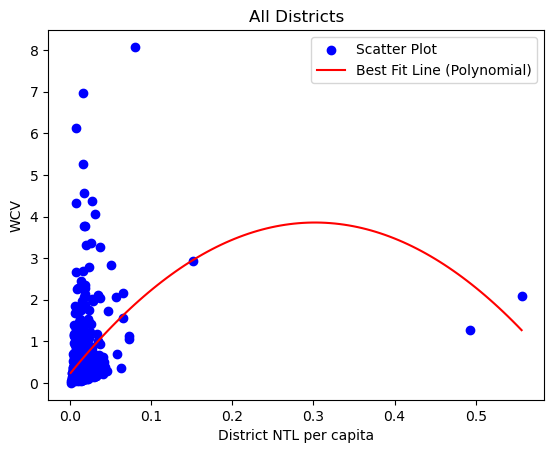

In [90]:
# Create a scatterplot
plt.scatter(wcv['dist_ntl_pc'], wcv['WCV'], label='Scatter Plot', color='blue', marker='o')

# Add labels and title
plt.xlabel("District NTL per capita")
plt.ylabel("WCV")
plt.title("All Districts")

# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcv['dist_ntl_pc'], wcv['WCV'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcv['dist_ntl_pc']), max(wcv['dist_ntl_pc']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

#### Dealing with Outliers

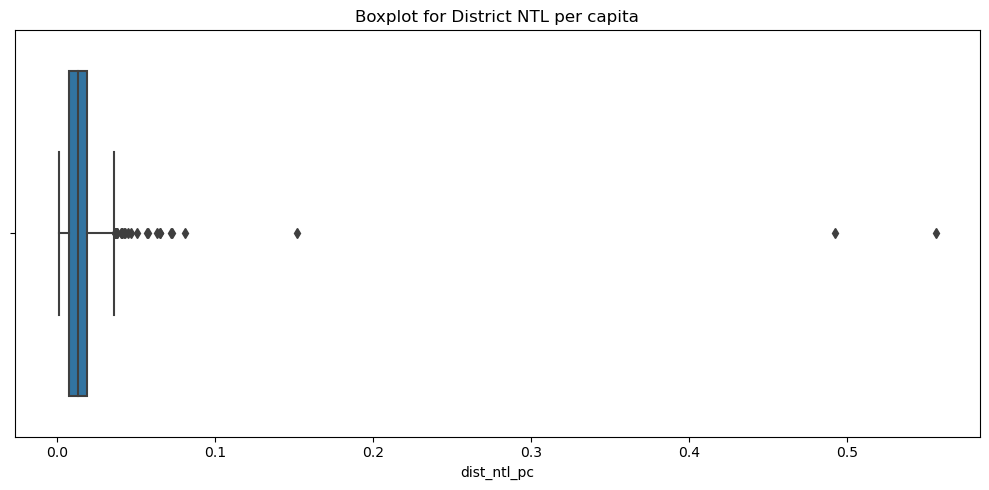

The upper whisker value is: 0.0362


In [92]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=wcvc, x='dist_ntl_pc', orient='h')
plt.title('Boxplot for District NTL per capita')

# Calculate whisker values
q1 = wcvc['dist_ntl_pc'].quantile(0.25)
q3 = wcvc['dist_ntl_pc'].quantile(0.75)
iqr = q3 - q1
upper_whisker_ntl = q3 + 1.5 * iqr
lower_whisker_ntl = q1 - 1.5 * iqr

# Add whisker values to the plot
# plt.text(1, upper_whisker, f'Upper Whisker: {upper_whisker_ntl:.4f}', ha='left', va='bottom', color='red')
# plt.text(1, lower_whisker, f'Lower Whisker: {lower_whisker_ntl:.4f}', ha='right', va='top', color='red')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

print(f"The upper whisker value is: {upper_whisker_ntl:.4f}")

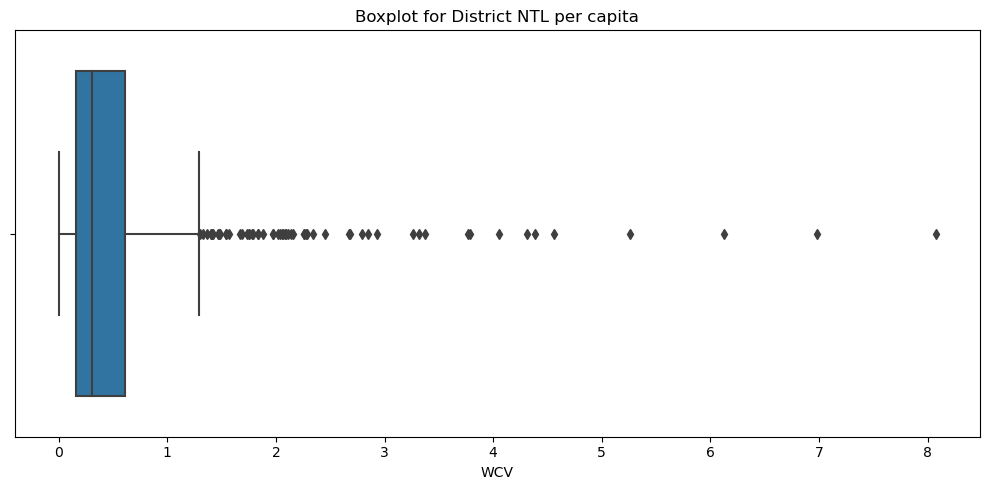

The upper whisker value is: 1.2916


In [93]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=wcvc, x='WCV', orient='h')
plt.title('Boxplot for District NTL per capita')

# Calculate whisker values
q1 = wcvc['WCV'].quantile(0.25)
q3 = wcvc['WCV'].quantile(0.75)
iqr = q3 - q1
upper_whisker_ntl = q3 + 1.5 * iqr
lower_whisker_ntl = q1 - 1.5 * iqr

# Add whisker values to the plot
# plt.text(1, upper_whisker, f'Upper Whisker: {upper_whisker_ntl:.4f}', ha='left', va='bottom', color='red')
# plt.text(1, lower_whisker, f'Lower Whisker: {lower_whisker_ntl:.4f}', ha='right', va='top', color='red')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

print(f"The upper whisker value is: {upper_whisker_ntl:.4f}")

In [94]:
wcvc = wcvc[wcvc['dist_ntl_pc'] <= 0.0362]
wcvc = wcvc[wcvc['WCV'] <= 1.2916]
wcvc

,District,District_code,State,dist_ntl_pc,WCV,dist_ntl,dist_population,dist_ntl_adm,dist_ntl_pc_adm,WCV_adm,dist_ntl_edu,dist_ntl_pc_edu,WCV_edu,dist_ntl_med,dist_ntl_pc_med,WCV_med
0,24 PARAGANAS NORTH,337.00000,WESTBENGAL,0.00464,0.48234,27768.72298,5979790.00000,1449.52734,0.00024,0.11020,1096.86456,0.00018,0.09586,272.13349,0.00005,0.04775
1,24 PARAGANAS SOUTH,343.00000,WESTBENGAL,0.00407,0.18129,35600.34826,8740691.00000,1858.33818,0.00021,0.04142,1406.21376,0.00016,0.03603,348.88341,0.00004,0.01795
2,ADILABAD,532.00000,TELANGANA,0.02603,0.34807,14509.40529,557344.00000,757.39096,0.00136,0.07952,573.12151,0.00103,0.06918,142.19217,0.00026,0.03446
3,AGAR MALWA,0.00000,MADHYA PRADESH,0.01579,0.07655,7963.81906,504286.00000,415.71135,0.00082,0.01749,314.57085,0.00062,0.01521,78.04543,0.00015,0.00758
4,AGRA a,146.00000,UTTAR PRADESH,0.00911,0.31477,24309.54446,2669545.00000,1268.95822,0.00048,0.07192,960.22701,0.00036,0.06256,238.23354,0.00009,0.03116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591,demoz,0.00000,ANDHRA PRADESH,0.00786,0.09979,478.78793,60945.00000,24.99273,0.00041,0.02280,18.91212,0.00031,0.01983,4.69212,0.00008,0.00988
592,rewa a,0.00000,UTTAR PRADESH,0.00775,0.07012,24145.74876,3116857.00000,1260.40809,0.00040,0.01602,953.75708,0.00031,0.01394,236.62834,0.00008,0.00694
593,test dist,0.00000,ANDHRA PRADESH,0.02695,0.35656,59767.31391,2217985.00000,3119.85379,0.00141,0.08146,2360.80890,0.00106,0.07086,585.71968,0.00026,0.03530
594,viewnew,0.00000,ANDHRA PRADESH,0.02186,0.15704,73165.98410,3346483.00000,3819.26437,0.00114,0.03588,2890.05637,0.00086,0.03121,717.02664,0.00021,0.01555


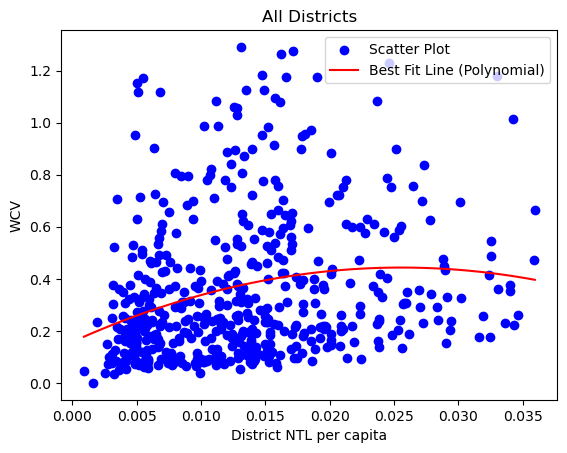

In [96]:



# Create a scatterplot
plt.scatter(wcvc['dist_ntl_pc'], wcvc['WCV'], label='Scatter Plot', color='blue', marker='o')

# Add labels and title
plt.xlabel("District NTL per capita")
plt.ylabel("WCV")
plt.title("All Districts")

# Fit a polynomial best fit line (e.g., a quadratic curve)
coefficients = np.polyfit(wcvc['dist_ntl_pc'], wcvc['WCV'], 2)  # Adjust the degree as needed
polynomial = np.poly1d(coefficients)
x_range = np.linspace(min(wcvc['dist_ntl_pc']), max(wcvc['dist_ntl_pc']), 100)
y_fit = polynomial(x_range)

# Plot the polynomial best fit line
plt.plot(x_range, y_fit, color='red', label='Best Fit Line (Polynomial)')

# Add a legend
plt.legend()

# Display the plot

plt.show()

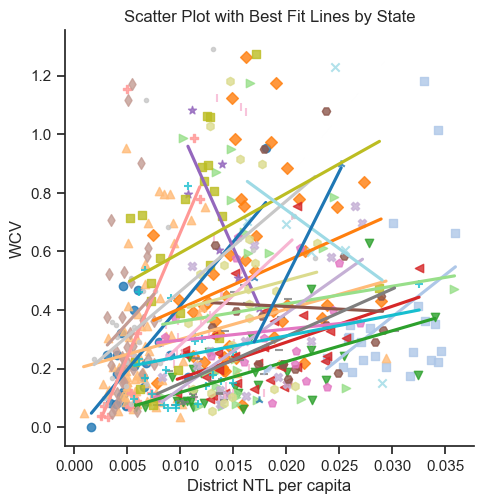

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming wcvc is your DataFrame containing 'dist_ntl_pc', 'WCV', and 'State' columns

# Create a scatterplot with different colors for each State and add best-fit lines
sns.set(style="ticks")
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'P', '*', 'X', 'H', 'd', 'p', '|', '_', '.', ',','h','+','x','2','4']  # Define a list of markers
unique_states = wcvc['State'].unique()

g = sns.lmplot(
    x='dist_ntl_pc', y='WCV', hue='State', data=wcvc,
    ci=None, markers=markers[:len(unique_states)], palette="tab20", legend=False
)

# Calculate and plot best-fit lines for each State
# for i, state in enumerate(unique_states):
#     data = wcvc[wcvc['State'] == state]
#     coefficients = np.polyfit(data['dist_ntl_pc'], data['WCV'], 2)
#     polynomial = np.poly1d(coefficients)
#     x_range = np.linspace(min(data['dist_ntl_pc']), max(data['dist_ntl_pc']), 100)
#     y_fit = polynomial(x_range)
#     plt.plot(x_range, y_fit, label=f'Best Fit Line ({state})', marker=markers[i])

# Add labels and title
plt.xlabel("District NTL per capita")
plt.ylabel("WCV")
plt.title("Scatter Plot with Best Fit Lines by State")

# Show legend
# plt.legend()

# Show the plot
plt.show()


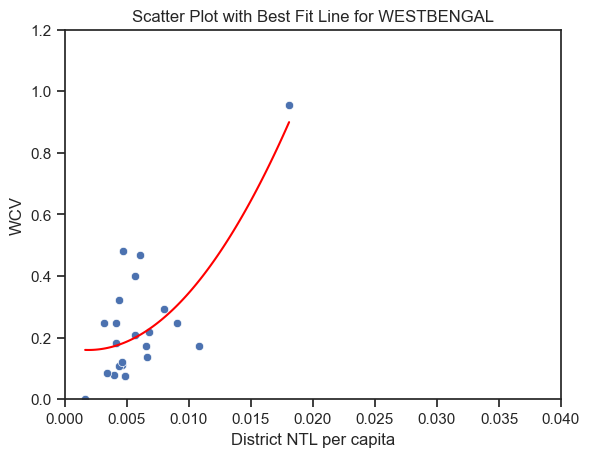

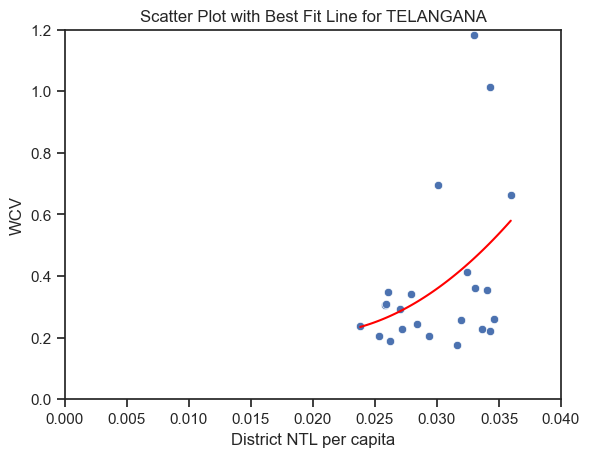

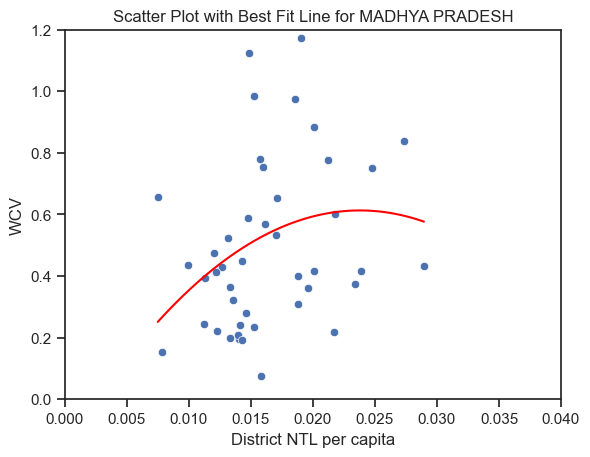

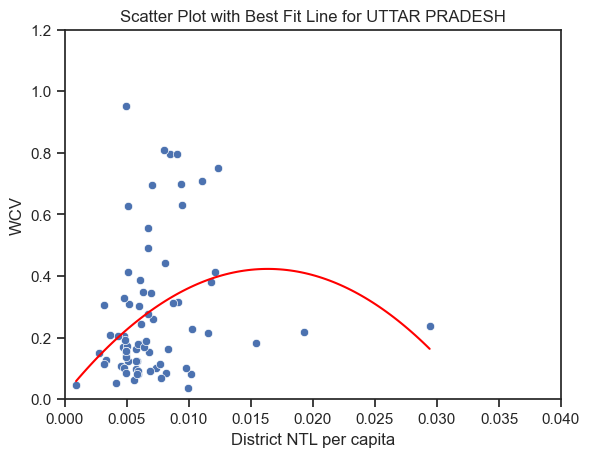

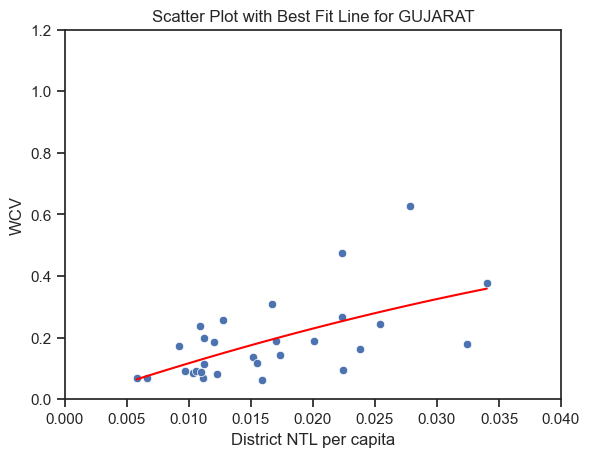

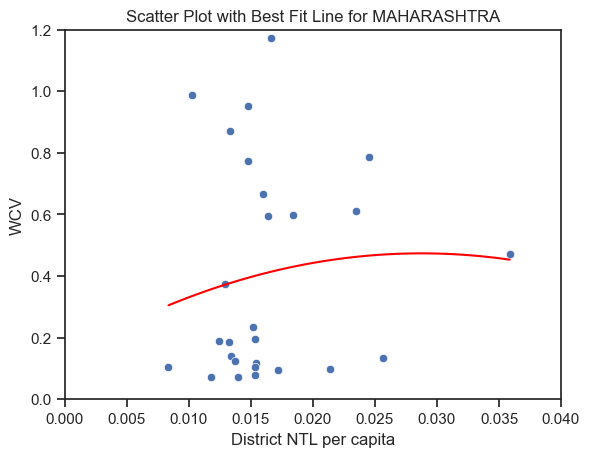

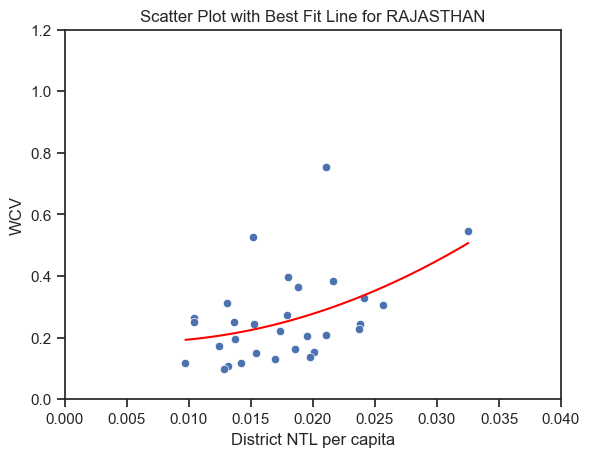

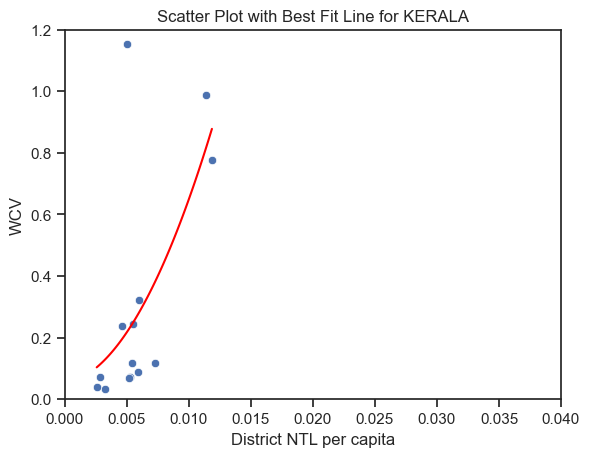

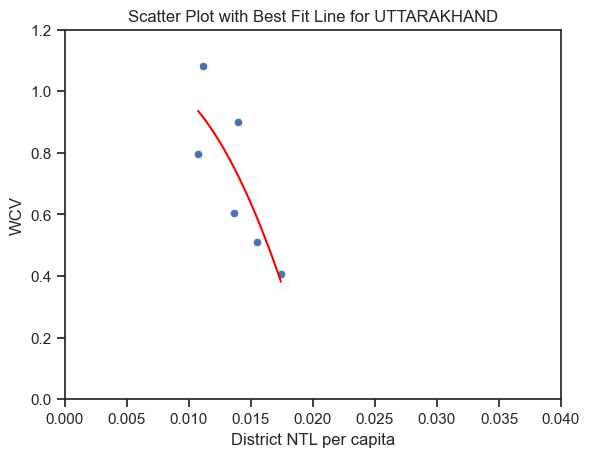

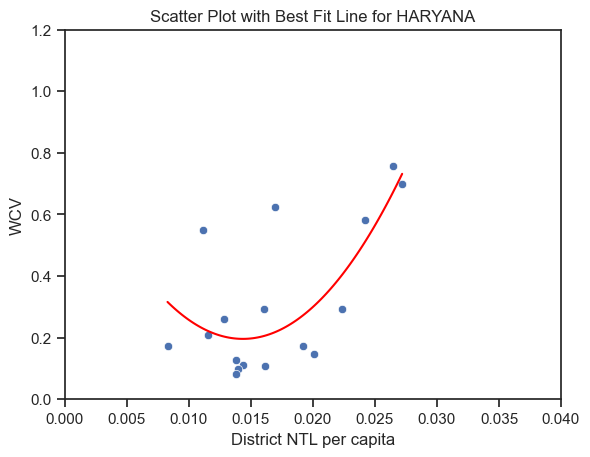

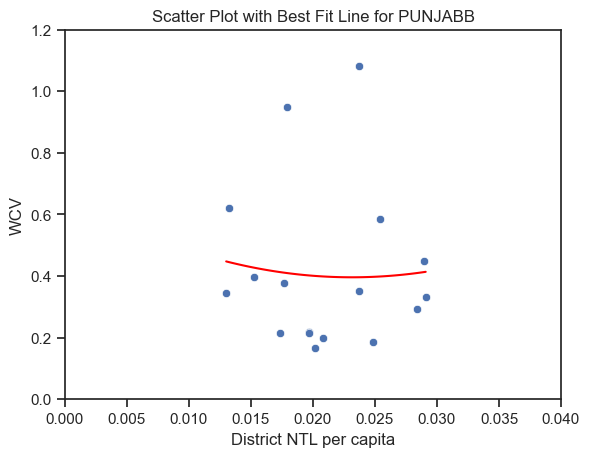

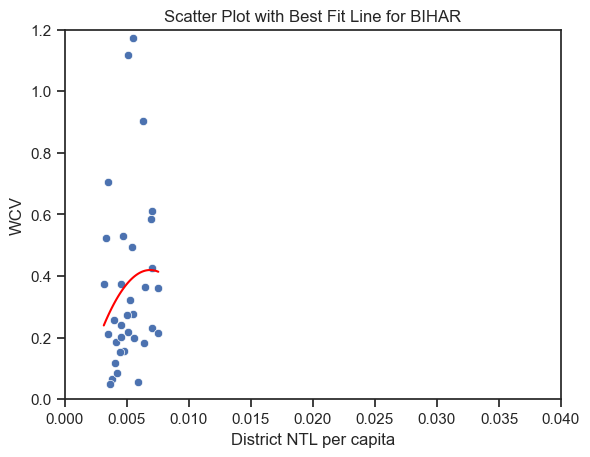

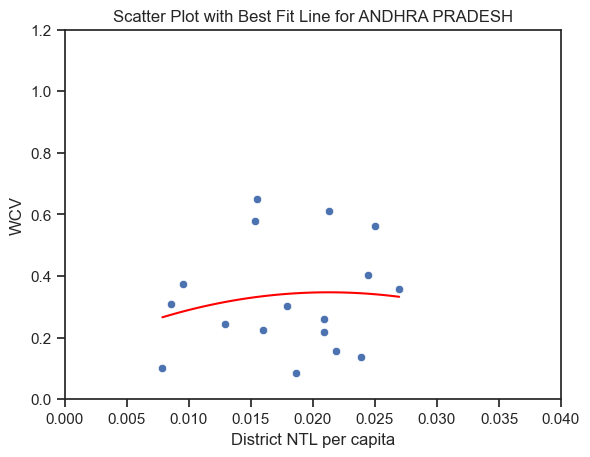

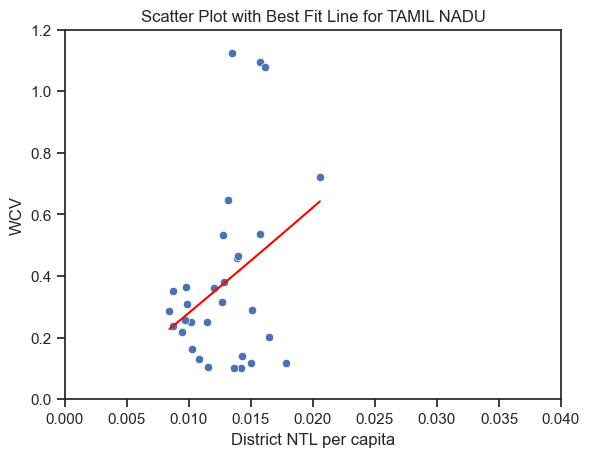

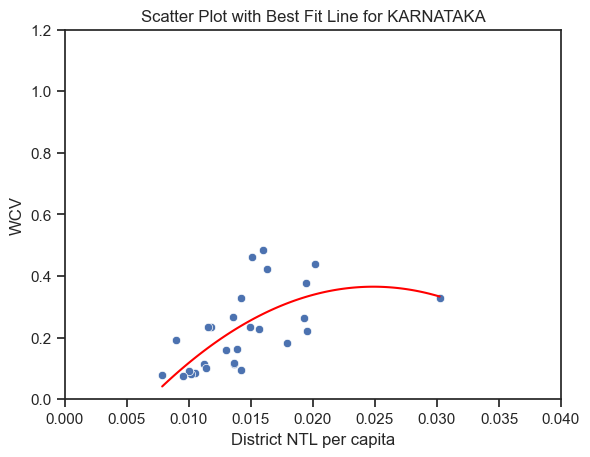

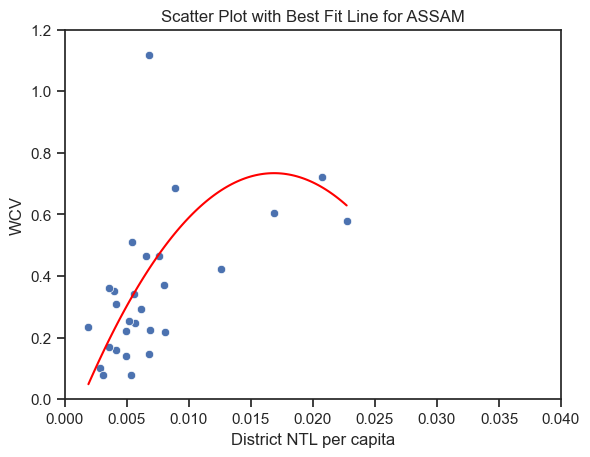

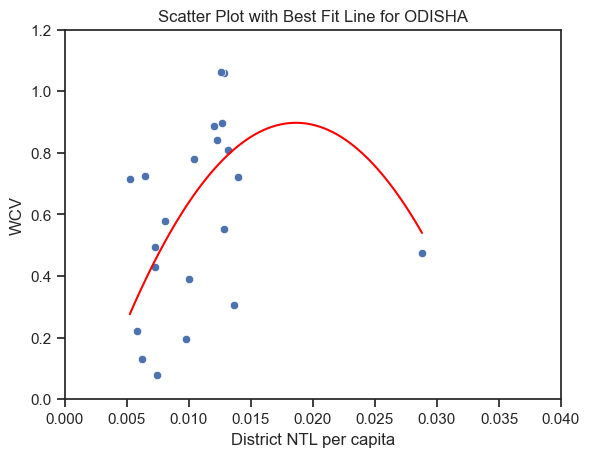

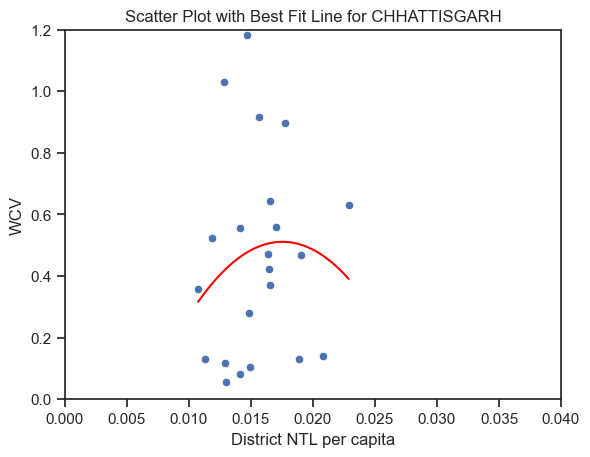

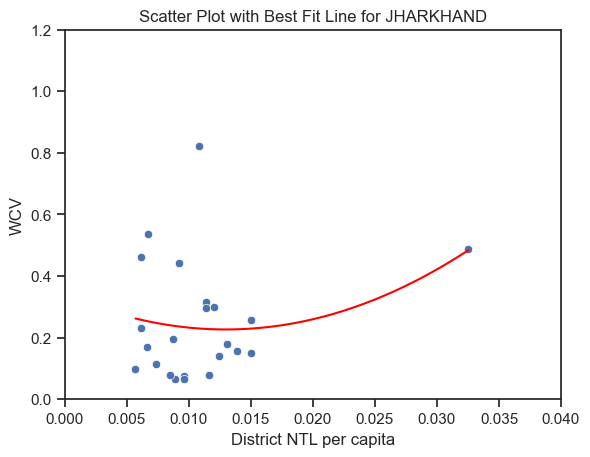

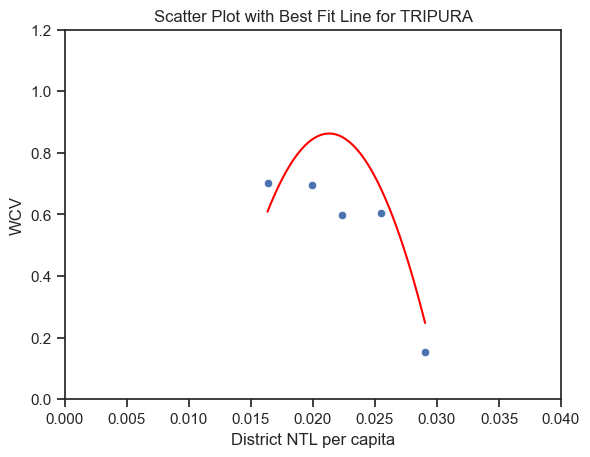

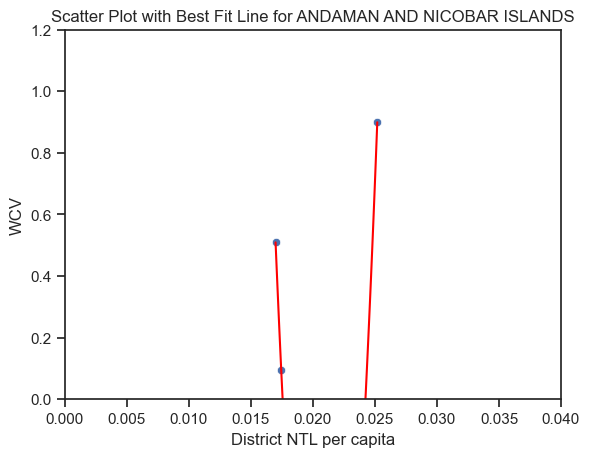

/Users/sid/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


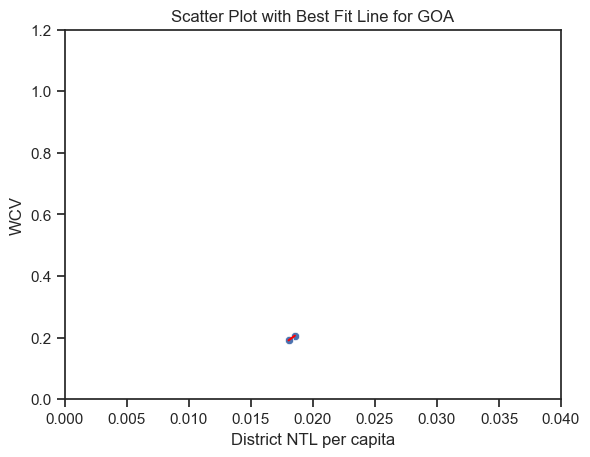

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming wcvc is your DataFrame containing 'dist_ntl_pc', 'WCV', and 'State' columns

# Get unique state names
unique_states = wcvc['State'].unique()

# Create separate scatter plots with best fit line for each state
for state in unique_states:
    state_data = wcvc[wcvc['State'] == state]
    
    plt.figure()  # Create a new figure for each plot
    sns.scatterplot(x='dist_ntl_pc', y='WCV', data=state_data)
    
    # Fit a polynomial best fit line (e.g., a quadratic curve)
    coefficients = np.polyfit(state_data['dist_ntl_pc'], state_data['WCV'], 2)  # Quadratic fit
    polynomial = np.poly1d(coefficients)
    x_range = np.linspace(min(state_data['dist_ntl_pc']), max(state_data['dist_ntl_pc']), 100)
    y_fit = polynomial(x_range)
    plt.plot(x_range, y_fit, color='red')
    
    # Set x and y-axis limits
    plt.xlim(0, 0.04)
    plt.ylim(0, 1.2)
    
    # Add labels, title, legend, and show plot
    plt.xlabel("District NTL per capita")
    plt.ylabel("WCV")
    plt.title(f"Scatter Plot with Best Fit Line for {state}")
    # plt.legend()
    plt.show()
